In [1]:
# Lectura de librerías
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Lectura de datos 
DEM_CARNE <- read_csv("DEM_CARNE.csv")

Rows: 30 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): P, Q, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Estadística descriptiva
summary(DEM_CARNE)

       P                Q                Y        
 Min.   : 4.016   Min.   : 2.903   Min.   :184.8  
 1st Qu.: 6.556   1st Qu.: 6.288   1st Qu.:320.4  
 Median : 7.737   Median : 9.813   Median :385.9  
 Mean   : 8.374   Mean   :10.892   Mean   :409.4  
 3rd Qu.:10.523   3rd Qu.:14.089   3rd Qu.:485.4  
 Max.   :14.219   Max.   :33.908   Max.   :760.3  

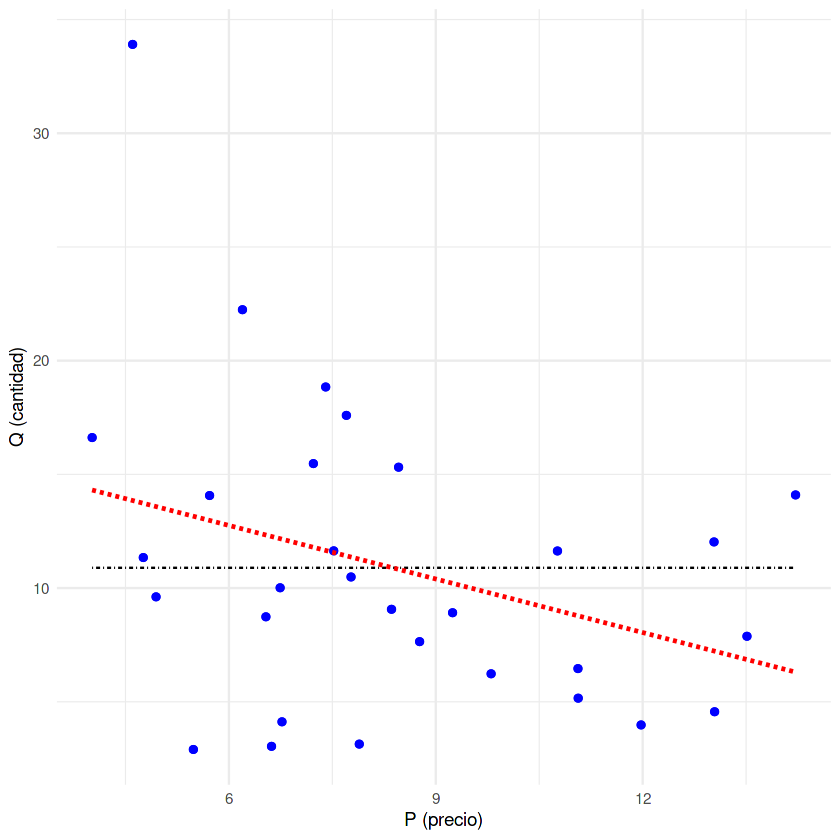

In [4]:
# Gráficas
ggplot(DEM_CARNE, aes(x = P, y = Q)) +
  geom_point(color = "blue") +
  geom_jitter(color = "blue") +
  geom_function(fun = function(x) {y = mean(DEM_CARNE$Q)}, linetype = "dotdash") +
  geom_smooth(method='lm', formula = y~x, se = FALSE, color = "red", linetype = "dashed") +
  xlab("P (precio)") +
  ylab("Q (cantidad)") +
  theme_minimal()

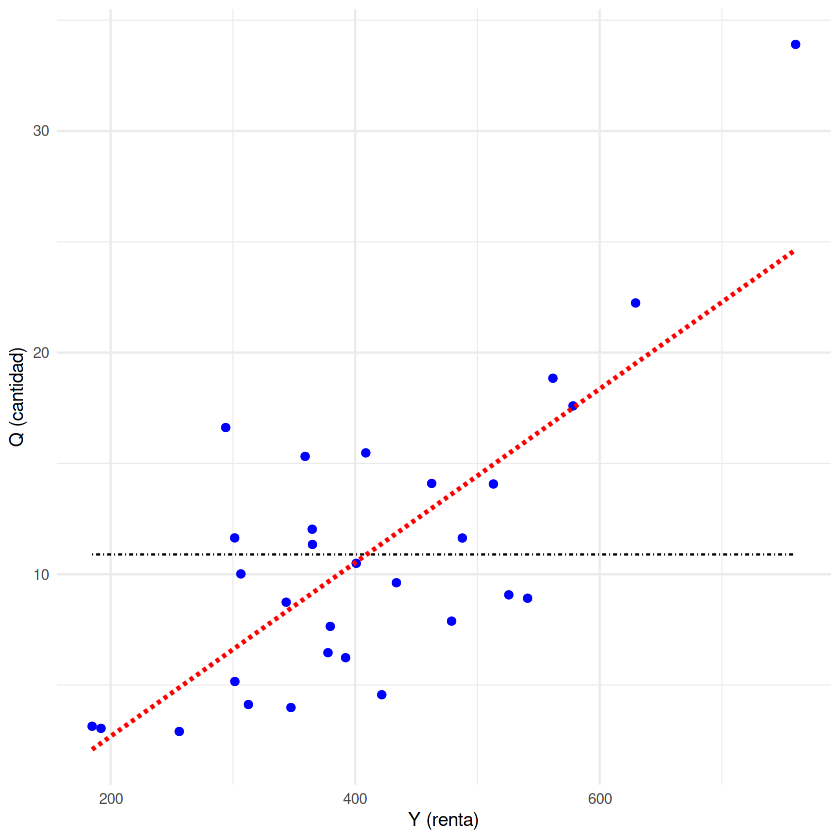

In [5]:
ggplot(DEM_CARNE, aes(x = Y, y = Q)) +
  geom_point(color = "blue") +
  geom_jitter(color = "blue") +
  geom_function(fun = function(x) {y = mean(DEM_CARNE$Q)}, linetype = "dotdash") +
  geom_smooth(method='lm', formula = y~x, se = FALSE, color = "red", linetype = "dashed") +
  xlab("Y (renta)") +
  ylab("Q (cantidad)") +
  theme_minimal()

In [6]:
# Regresión lineal
modelo_lineal <- lm(formula = Q ~ P + Y, data = DEM_CARNE)
summary(modelo_lineal)


Call:
lm(formula = Q ~ P + Y, data = DEM_CARNE)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4429 -2.6144 -0.5625  1.7284  6.8800 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.345236   3.301677   0.407  0.68690    
P           -0.767780   0.259243  -2.962  0.00631 ** 
Y            0.039020   0.005762   6.772 2.84e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.966 on 27 degrees of freedom
Multiple R-squared:  0.6709,	Adjusted R-squared:  0.6465 
F-statistic: 27.52 on 2 and 27 DF,  p-value: 3.052e-07
